In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create a pandas dataframe for the data.

df = pd.read_csv("movies.csv")

In [3]:
# Let's take a look at the data.

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# View dataframe information to see if there is missing data. 
# The total number of rows and columns, and the data type of each column can also be viewed from the info() method.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
# Fill in missing data for 'budget' and 'gross' columns.
# Using 'transform' allows us to fill in data with mean values as calculated based on the corresponding year.

df['budget'] = df.groupby('year')['budget'].transform(lambda x: x.fillna(x.mean()))
df['gross'] = df.groupby('year')['gross'].transform(lambda x: x.fillna(x.mean()))

In [5]:
# Fill in missing data for the remaining columns.

for col in df.columns:
        
    if sum(df[col].isnull()):
            
        if df[col].dtype == 'O':
            df[col] = df[col].fillna(df[col].mode()[0])
            
        else:
            df[col] = df[col].fillna(df[col].mean())
            
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# Let's look at some of the statistics of the numerical columns.

df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7668.000000,7.668000e+03,7.668000e+03,7.668000e+03,7668.000000
mean,2000.405451,6.390411,8.810850e+04,3.390723e+07,7.765470e+07,107.261613
std,11.153508,0.968652,1.632918e+05,3.621760e+07,1.638973e+08,18.576400
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.210319e+07,4.681151e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.200000e+07,2.100874e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.428688e+07,7.406123e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
# Change the data types of some columns.

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [8]:
# Create a date column.

df['date'] = df['released'].apply(lambda x: x.split('(')[0])

df['date'] = pd.to_datetime(df['date'])

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25


In [9]:
# Create 'released_year' column that matches the year from the date.

df['released_year'] = df['date'].apply(lambda x: x.year)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980


In [10]:
# Check for duplicate rows.

sum(df.duplicated())

0

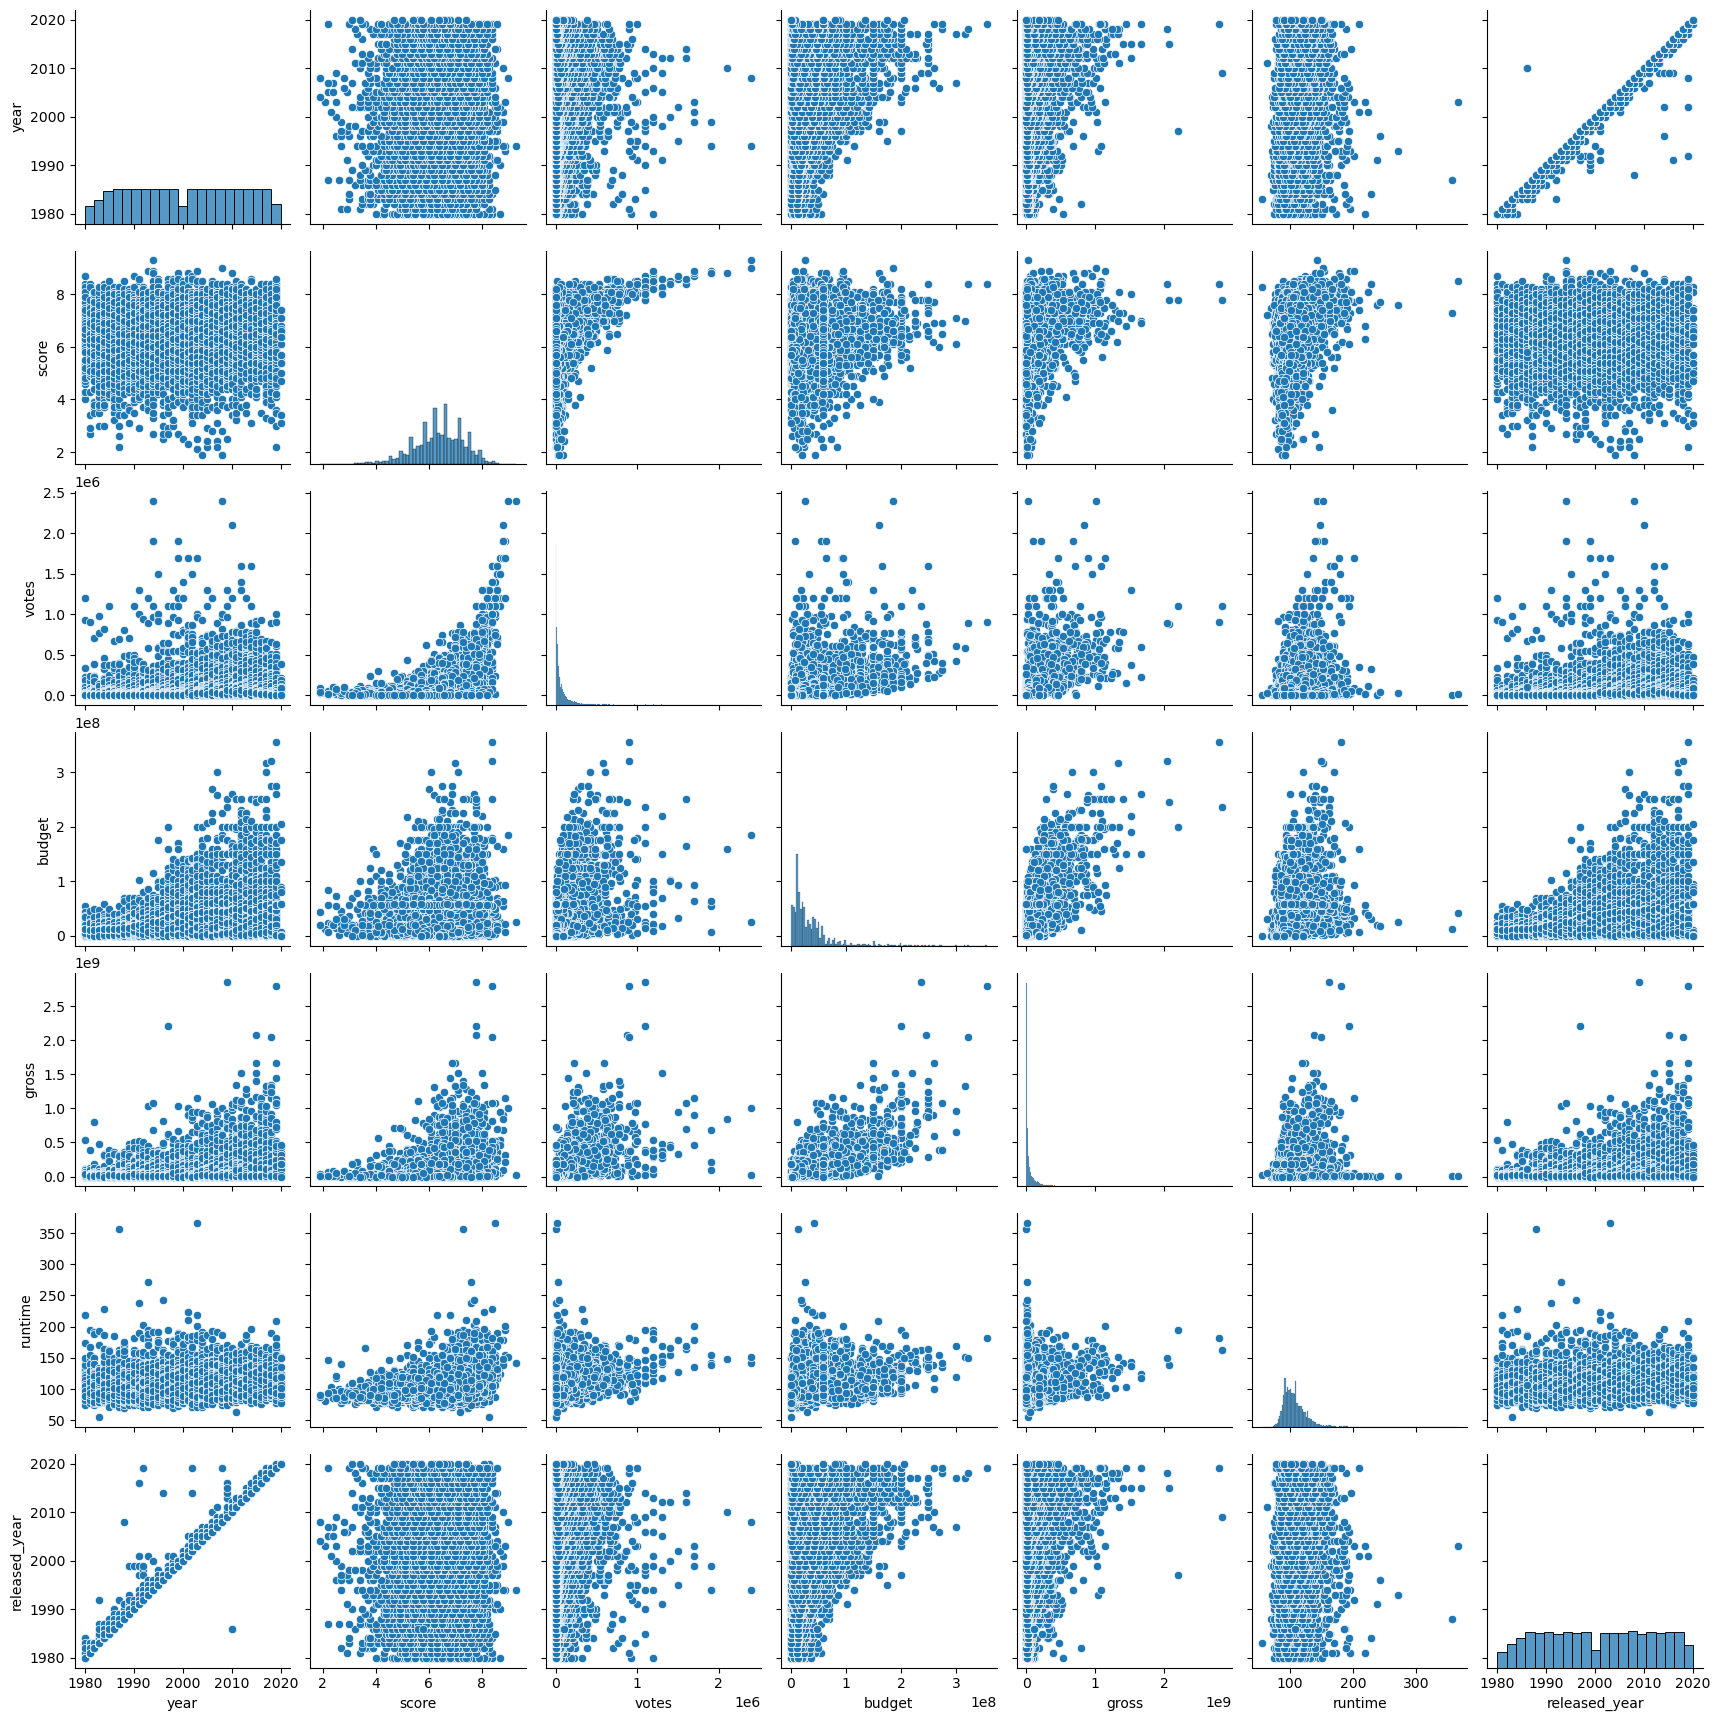

In [11]:
# Visualize the relationships between the numerical columns.

sns.pairplot(df)

<AxesSubplot:xlabel='budget', ylabel='gross'>

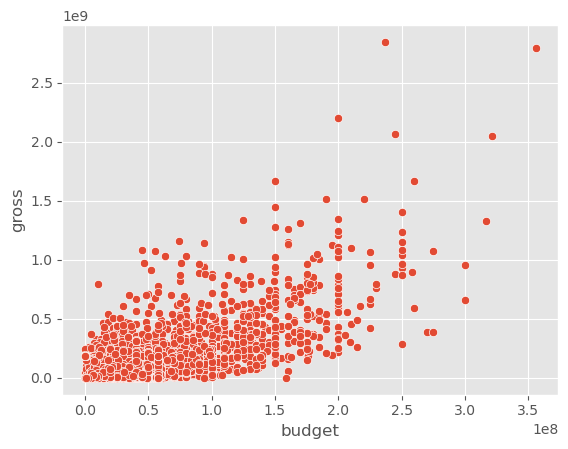

In [12]:
# From the pairplot above, there seem to be a high correlation between the 'gross' and the 'budget' columns.
# Let's plot a scatter plot to have a closer look at this relationship.

plt.style.use('ggplot')
sns.scatterplot(x='budget', y='gross', data=df)

<AxesSubplot:xlabel='budget', ylabel='gross'>

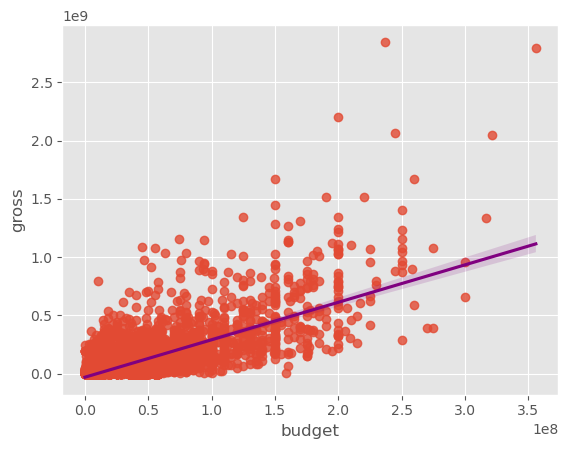

In [13]:
# Let's visualize the trend using a regplot

sns.regplot(x='budget', y='gross', data=df, line_kws={"color":"purple"})

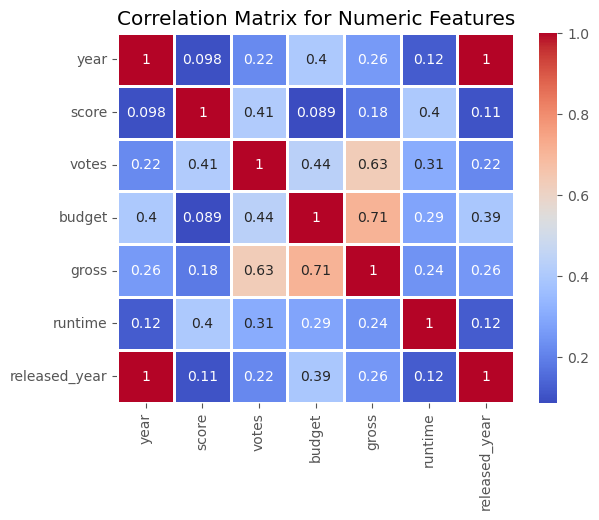

In [14]:
# Let's look at the correlations in the data using a heatmap

sns.heatmap(df.corr(), cmap='coolwarm', linewidths=1, annot=True)

plt.title("Correlation Matrix for Numeric Features")

plt.show()

In [15]:
# Convert the data type of the string columns from 'object' to 'numeric'.

df_numerized = df

for col in df_numerized.columns:
    if df_numerized[col].dtype == 'O':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,released_year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1980-06-13,1980
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1980-07-02,1980
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1980-06-20,1980
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1980-07-02,1980
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1980-07-25,1980


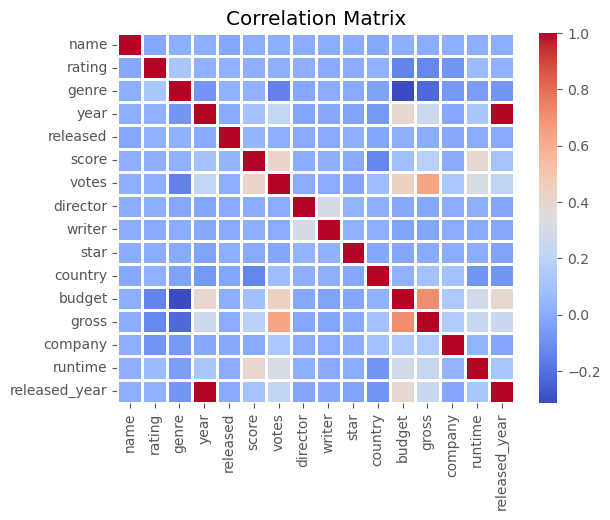

In [16]:
# Let's look at the correlations again but this time with more columns.

sns.heatmap(df_numerized.corr(), cmap='coolwarm', linewidths=1)

plt.title("Correlation Matrix")

plt.show()

In [17]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
name,1.000000,-0.012441,0.016355,0.011453,-0.011087,0.017095,0.013086,0.009079,0.010018,0.006749,-0.010425,0.016955,0.006426,0.010369,0.010390,0.010379
rating,-0.012441,1.000000,0.123465,0.027931,0.023643,0.013246,0.012378,0.016255,-0.002795,0.005314,0.026930,-0.143725,-0.129658,-0.079626,0.066641,0.028017
genre,0.016355,0.123465,1.000000,-0.081261,0.029997,0.027959,-0.145276,-0.015258,0.006746,-0.004856,-0.035896,-0.313041,-0.230847,-0.070013,-0.052699,-0.078120
year,0.011453,0.027931,-0.081261,1.000000,-0.000484,0.097936,0.222810,-0.020795,-0.007901,-0.027745,-0.069423,0.399852,0.262123,-0.011438,0.120766,0.996802
released,-0.011087,0.023643,0.029997,-0.000484,1.000000,0.042617,0.016114,-0.001492,-0.003461,0.015550,-0.022042,0.013354,0.001094,-0.008443,0.000867,-0.004379
score,0.017095,0.013246,0.027959,0.097936,0.042617,1.000000,0.409182,0.009559,0.019795,-0.000979,-0.134577,0.088516,0.184681,-0.004594,0.399329,0.106144
votes,0.013086,0.012378,-0.145276,0.222810,0.016114,0.409182,1.000000,0.000260,0.000232,-0.019452,0.073582,0.436091,0.630708,0.130638,0.309166,0.218229
director,0.009079,0.016255,-0.015258,-0.020795,-0.001492,0.009559,0.000260,1.000000,0.299512,0.039715,0.017926,-0.006136,-0.014596,0.004250,0.017624,-0.020399
writer,0.010018,-0.002795,0.006746,-0.007901,-0.003461,0.019795,0.000232,0.299512,1.000000,0.028745,0.014409,-0.027533,-0.023237,0.001665,-0.003698,-0.007694
star,0.006749,0.005314,-0.004856,-0.027745,0.015550,-0.000979,-0.019452,0.039715,0.028745,1.000000,-0.014749,-0.018140,-0.001876,0.008072,0.009273,-0.028117


In [18]:
pd.set_option('display.max_rows', None)

In [19]:
# Let's view the correlation between each column and the others.

correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs.head(20)

name    name             1.000000
        rating          -0.012441
        genre            0.016355
        year             0.011453
        released        -0.011087
        score            0.017095
        votes            0.013086
        director         0.009079
        writer           0.010018
        star             0.006749
        country         -0.010425
        budget           0.016955
        gross            0.006426
        company          0.010369
        runtime          0.010390
        released_year    0.010379
rating  name            -0.012441
        rating           1.000000
        genre            0.123465
        year             0.027931
dtype: float64

In [20]:
# View the correlations in pairs

sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head(20)

genre          budget          -0.313041
budget         genre           -0.313041
genre          gross           -0.230847
gross          genre           -0.230847
genre          votes           -0.145276
votes          genre           -0.145276
rating         budget          -0.143725
budget         rating          -0.143725
score          country         -0.134577
country        score           -0.134577
rating         gross           -0.129658
gross          rating          -0.129658
genre          year            -0.081261
year           genre           -0.081261
released_year  country         -0.080221
country        released_year   -0.080221
rating         company         -0.079626
company        rating          -0.079626
runtime        country         -0.079265
country        runtime         -0.079265
dtype: float64

In [21]:
# View only column pairs with high correlation.

high_correlation = sorted_pairs[(sorted_pairs) > 0.5]

high_correlation

votes          gross            0.630708
gross          votes            0.630708
budget         gross            0.710483
gross          budget           0.710483
released_year  year             0.996802
year           released_year    0.996802
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
dtype: float64

In [22]:
# votes and budget have the highest correlation to gross earnings